In [1]:
from nn import Value, MLP
from plot import *

%load_ext autoreload
%autoreload 2

In [2]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1
x1w1.label = 'x1*w1'
x2w2 = x2*w2
x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b
n.label = 'n'
o = n.tanh()
o.label = 'o'
o.backward()

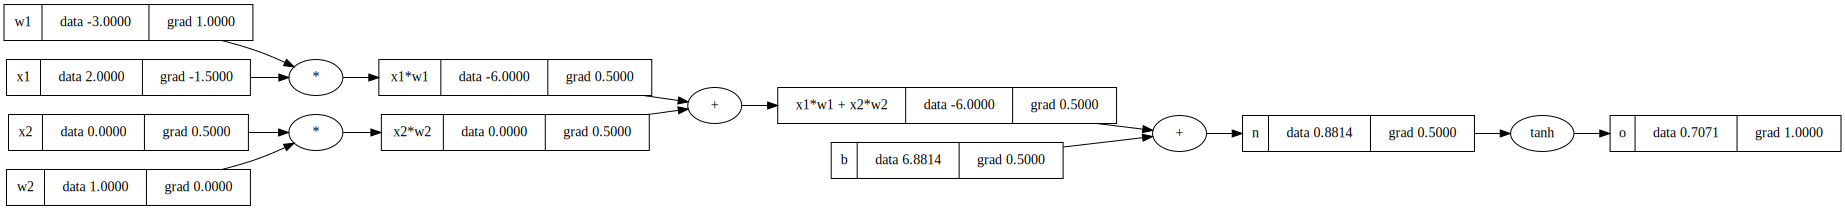

In [3]:
draw_dot(o)

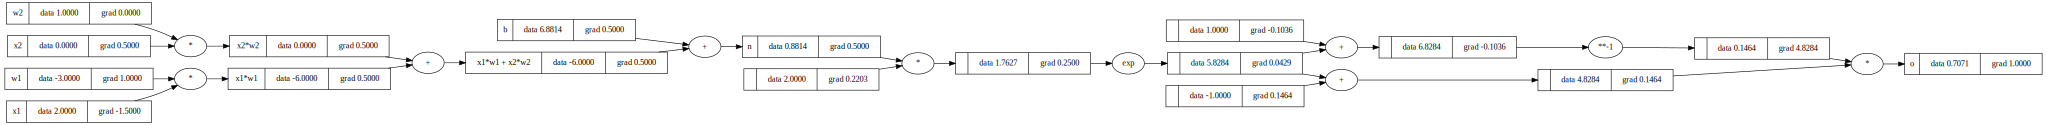

In [4]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# ----
e = (2*n).exp()
o = (e - 1) / (e + 1)
# ----
o.label = 'o'
o.backward()
draw_dot(o)

In [5]:
x = [2.0, 3.0, -1.0]
net = MLP(3, [4, 4, 1])
net(x)

Value(data=0.39468194453500843)

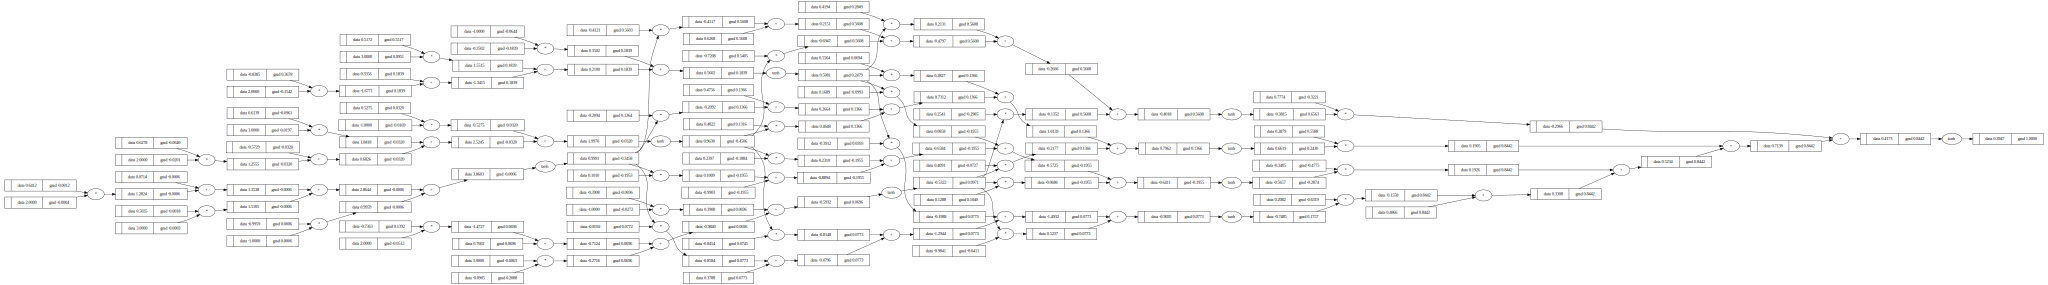

In [6]:
o = net(x)
o.backward()
draw_dot(o)

In [7]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [8]:
for k in range(20):
  
  # forward pass
  ypred = [net(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
  
  # backward pass
  for p in net.parameters():
    p.grad = 0.0
  loss.backward()
  
  # update
  for p in net.parameters():
    p.data += -0.1 * p.grad
  
  print(k, loss.data)
  

0 5.031549871754874
1 2.8515126358282914
2 1.4417546390087137
3 0.5963725595801029
4 0.28425642112505245
5 0.17421804723259254
6 0.12286269217037729
7 0.09395128387040752
8 0.07561504667577411
9 0.063032642395543
10 0.05390206578227013
11 0.046994494987043695
12 0.04159769582795558
13 0.03727186105314238
14 0.03373142379701304
15 0.030783249480400822
16 0.02829223211330075
17 0.026161135229345614
18 0.024318259990991783
19 0.02270962015149404


In [9]:
ypred

[Value(data=0.9142814735726786),
 Value(data=-0.9600822645067889),
 Value(data=-0.8951422707390414),
 Value(data=0.9473370587039407)]